In [1]:
inputs = r"C:\Users\DAI.STUDENTSDC\Desktop\NLP_CV\dataset\CV\images"
outputs = r"C:\Users\DAI.STUDENTSDC\Desktop\NLP_CV\CV\outputs"

In [3]:
import cv2
import numpy as np
import os

### Image Translation / Shifting

In [5]:
img = cv2.imread(os.path.join(inputs, 'sachin.jpg'))

In [7]:
# get the shape of input image
height, width, _ = img.shape

In [9]:
quarter_height, quarter_width = height //4, width // 4

In [11]:
# now create translational matrix
T = np.float32([[1, 0, quarter_width],[0, 1, quarter_height]])

In [8]:
T

array([[  1.,   0., 212.],
       [  0.,   1., 268.]], dtype=float32)

#### warpAffine( image, matrix, new size of image)

In [10]:
img_trans = cv2.warpAffine(img, T, (width, height))

In [11]:
cv2.imshow('translated image', img_trans)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
T = np.float32([[1, 0, 50], [0, 1, 100]])

In [13]:
img_trans_1 = cv2.warpAffine(img, T, (width, height))

In [14]:
cv2.imshow('translated image', img_trans_1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
T = np.float32([[1, 0, -100], [0, 1, 100]])
img_trans_1 = cv2.warpAffine(img, T, (width, height))
cv2.imshow('translated image', img_trans_1)
cv2.destroyAllWindows()

### Image Roatation

In [17]:
img_rot = cv2.rotate(img, cv2.ROTATE_180)
cv2.imshow('rotated image', img_rot)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
img_rot = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
cv2.imshow('rotated image', img_rot)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
center = [height//2, width//2]
center

[537, 425]

In [20]:
center = img.shape[1]//2, img.shape[0] // 2
center

(425, 537)

- which center is right from the above one?

#### creatimg the rotation matrix
cv2.getRotationMatrix2D(center, angle, scaling factor)

In [23]:
angle = 60 ## defalut rotation counter clockwise to make it clock wise do -60
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

In [24]:
## create the rotated image
rotated_image = cv2.warpAffine(img, rotation_matrix, (width, height))

In [25]:
cv2.imshow('rotated image', rotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
rotation_matrix = cv2.getRotationMatrix2D((500, 500), 75, 1.0)
rotated_image = cv2.warpAffine(img, rotation_matrix, (800, 800))
cv2.imshow('rotated image', rotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [27]:
rotation_matrix

array([[ 2.58819045e-01,  9.65925826e-01, -1.12372436e+02],
       [-9.65925826e-01,  2.58819045e-01,  8.53553391e+02]])

In [28]:
rotation_matrix = cv2.getRotationMatrix2D((500, 500), -75, 1.0)
rotated_image = cv2.warpAffine(img, rotation_matrix, (800, 800))
cv2.imshow('rotated image', rotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [29]:
cv2.imshow('rotated image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### rotation using pil

In [131]:
from PIL import Image

In [133]:
img_pil = Image.open(os.path.join(inputs, 'sachin.jpg') )

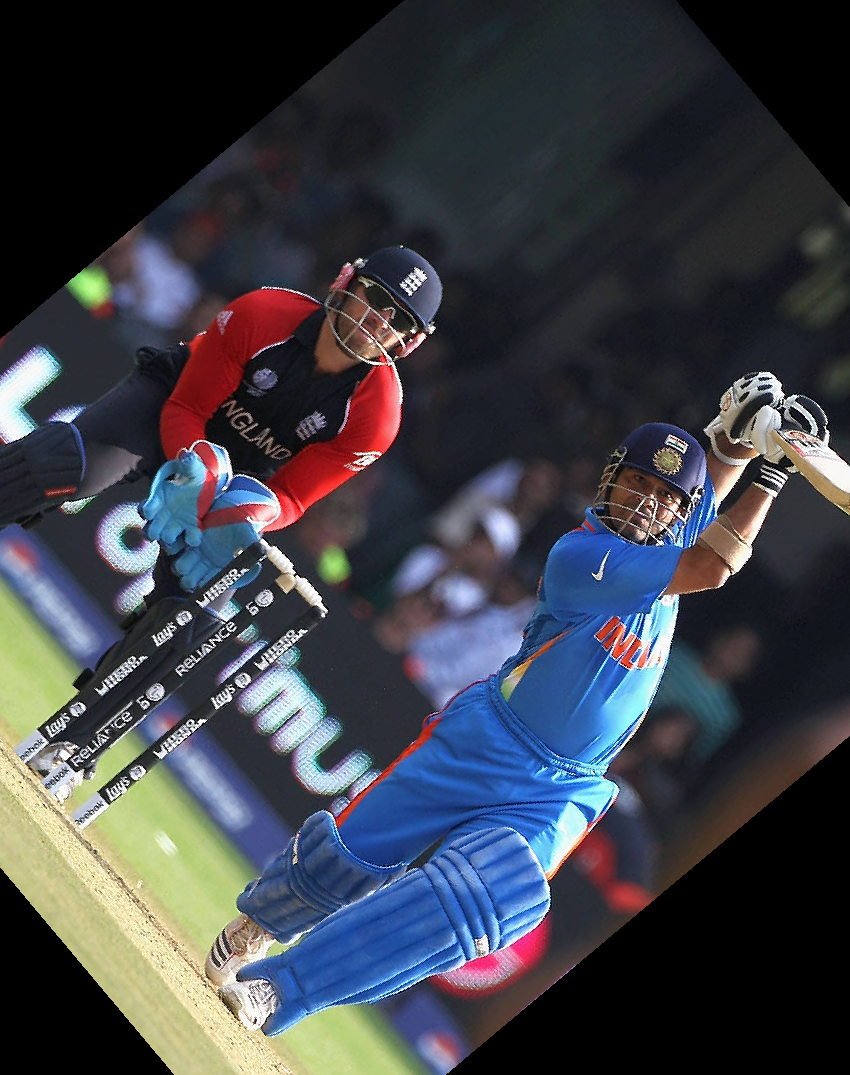

In [33]:
rot_img = img_pil.rotate(-50)
rot_img

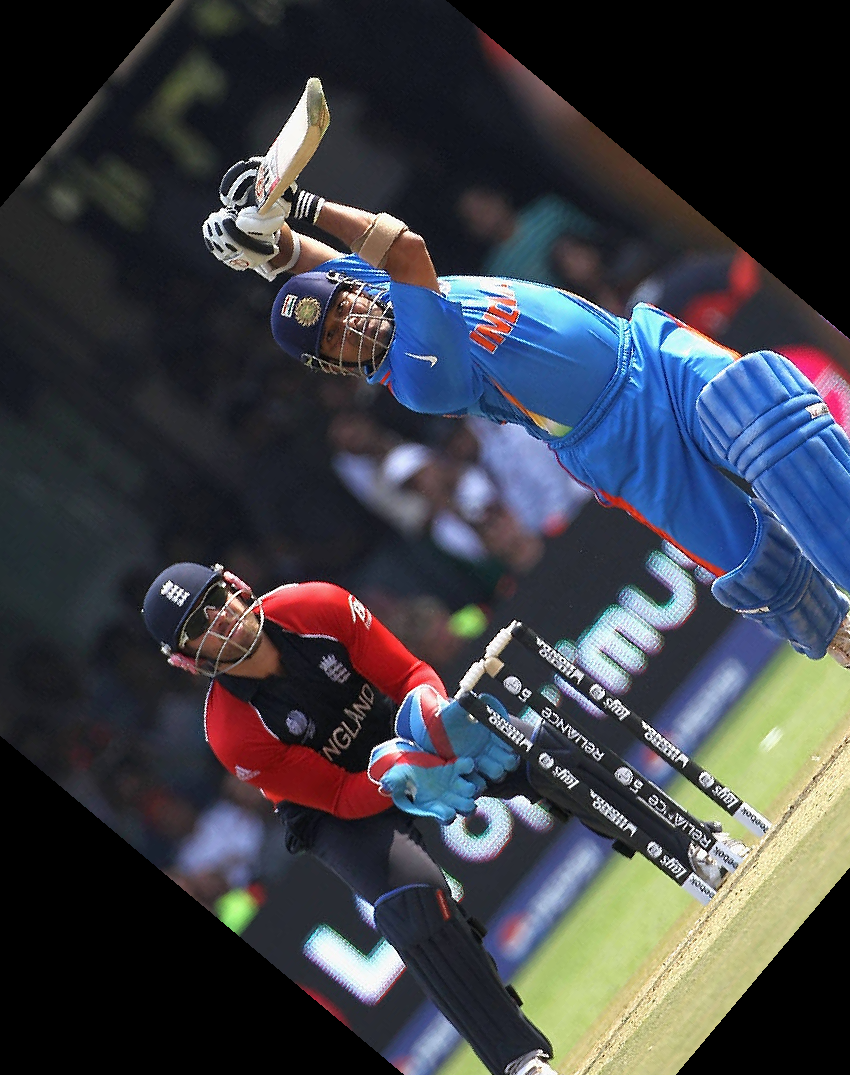

In [34]:
img_pil.rotate(50)

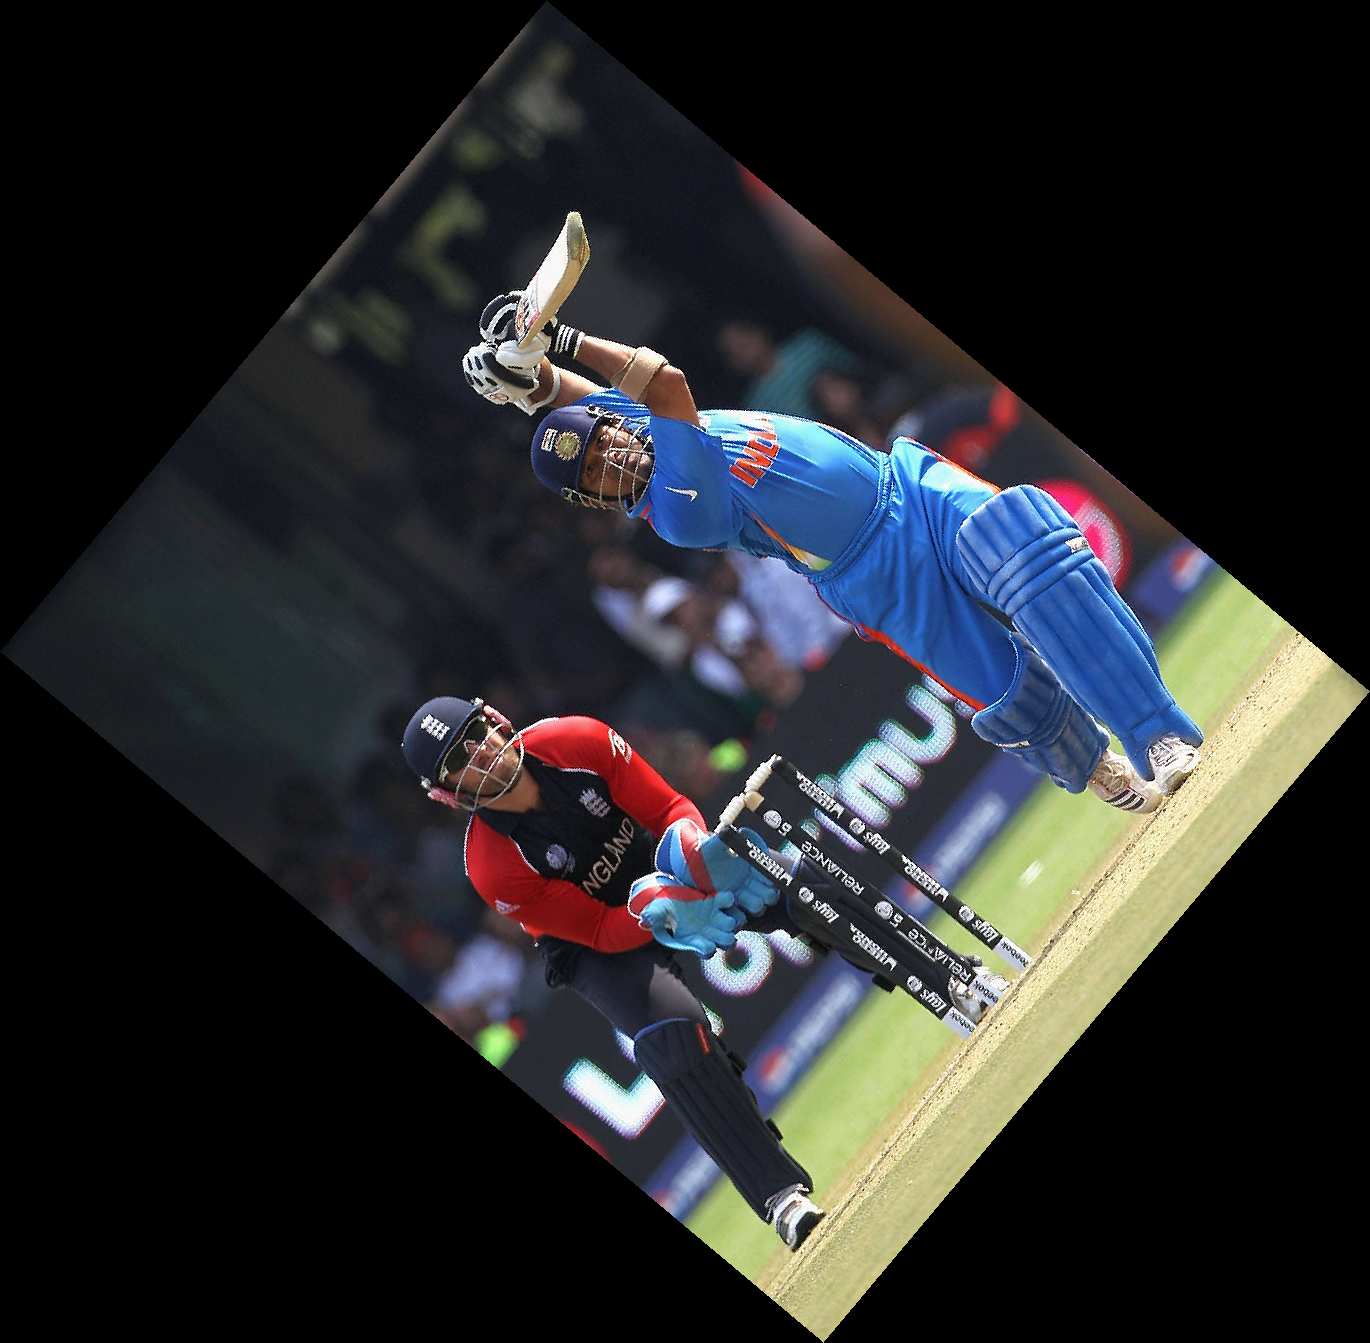

In [35]:
img_pil.rotate(50, expand = True) # if you don't want to loose the pixels use expand

### image resizing

In [37]:
resized_image = cv2.resize(img, [1200, 800])

In [38]:
cv2.imshow('resized_image', resized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### image Scaling

In [40]:
resized_image = cv2.resize(img, None, fx = .5, fy = .5)
cv2.imshow('resized_image', resized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [41]:
resized_image = cv2.resize(img, None, fx = .5, fy = .5, interpolation=cv2.INTER_CUBIC)
cv2.imshow('resized_image', resized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [42]:
resized_image = cv2.resize(img, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)
cv2.imshow('resized_image', resized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [43]:
help(cv2.resize)

Help on built-in function resize:

resize(...)
    resize(src, dsize[, dst[, fx[, fy[, interpolation]]]]) -> dst
    .   @brief Resizes an image.
    .
    .   The function resize resizes the image src down to or up to the specified size. Note that the
    .   initial dst type or size are not taken into account. Instead, the size and type are derived from
    .   the `src`,`dsize`,`fx`, and `fy`. If you want to resize src so that it fits the pre-created dst,
    .   you may call the function as follows:
    .   @code
    .       // explicitly specify dsize=dst.size(); fx and fy will be computed from that.
    .       resize(src, dst, dst.size(), 0, 0, interpolation);
    .   @endcode
    .   If you want to decimate the image by factor of 2 in each direction, you can call the function this
    .   way:
    .   @code
    .       // specify fx and fy and let the function compute the destination image size.
    .       resize(src, dst, Size(), 0.5, 0.5, interpolation);
    .   @endcode
   

#### resizing using PIL

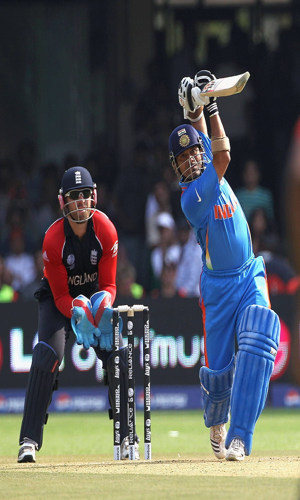

In [45]:
img_pil.resize((300, 500))

### resizing using skimage

In [47]:
from skimage.transform import resize, rescale
import matplotlib.pyplot as plt

In [48]:
img_ski = plt.imread(os.path.join(inputs, 'sachin.jpg'))

In [49]:
res_img = resize(img_ski, (400, 250))

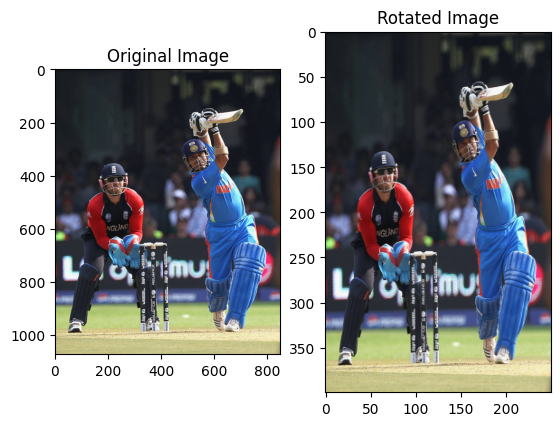

In [50]:
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_ski)
plt.subplot(1, 2, 2)
plt.title('Rotated Image')
plt.imshow(res_img)

### Image flipping
- horiontal, vertical and diagonal
- - fip_hor = cv2.flip(img, 0)
  - fip_ver = cv2.flip(img, 1)
  - fip_dg  = cv2.flip(img, -1)

In [109]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


# horizontal flip
fip_hor = cv2.flip(img_rgb, 0)

fip_ver = cv2.flip(img_rgb, 1)
fip_dg = cv2.flip(img_rgb, -1)

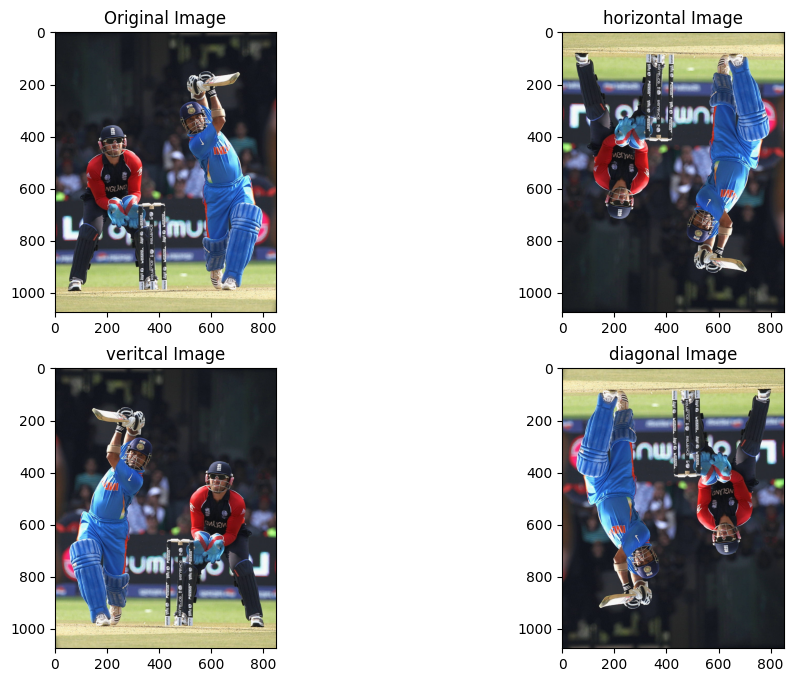

In [53]:
plt.figure(figsize = (12, 8))
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(img_rgb)
plt.subplot(2, 2, 2)
plt.title('horizontal Image')
plt.imshow(fip_hor)
plt.subplot(2, 2, 3)
plt.title('veritcal Image')
plt.imshow(fip_ver)
plt.subplot(2, 2, 4)
plt.title('diagonal Image')
plt.imshow(fip_dg)

In [54]:
img.shape

(1075, 850, 3)

### image Cropping

In [13]:
b, g, r = img[:, :, 0],img[:, :, 1], img[:, :, 2]

In [73]:
x, y = b.shape
p = .15

In [29]:
b = img[:, :, 0][int(x * p) : int(x * (100 - p)), int(y * .15) : int(y * (100 - p))]
g = img[:, :, 1][int(x * p) : int(x * (100 - p)), int(y * .15) : int(y * (100 - p))]
r = img[:, :, 2][int(x * p) : int(x * (100 - p)), int(y * .15) : int(y * (100 - p))]

In [35]:
n_img = np.dstack((b,g,r))

In [37]:
n_img.shape

(914, 723, 3)

In [41]:
cv2.imshow('cropped_image', n_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [43]:
cv2.imshow('cropped_image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [103]:
p = .25 # percentage you want to crop from all sides
n_img = img[int(x * p) : int(x * (100 - p)), int(y * .15) : int(y * (100 - p)),:]

In [105]:
n_img.shape

(847, 742, 3)

In [107]:
cv2.imshow('cropped_image', n_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [116]:
import matplotlib.pyplot as plt

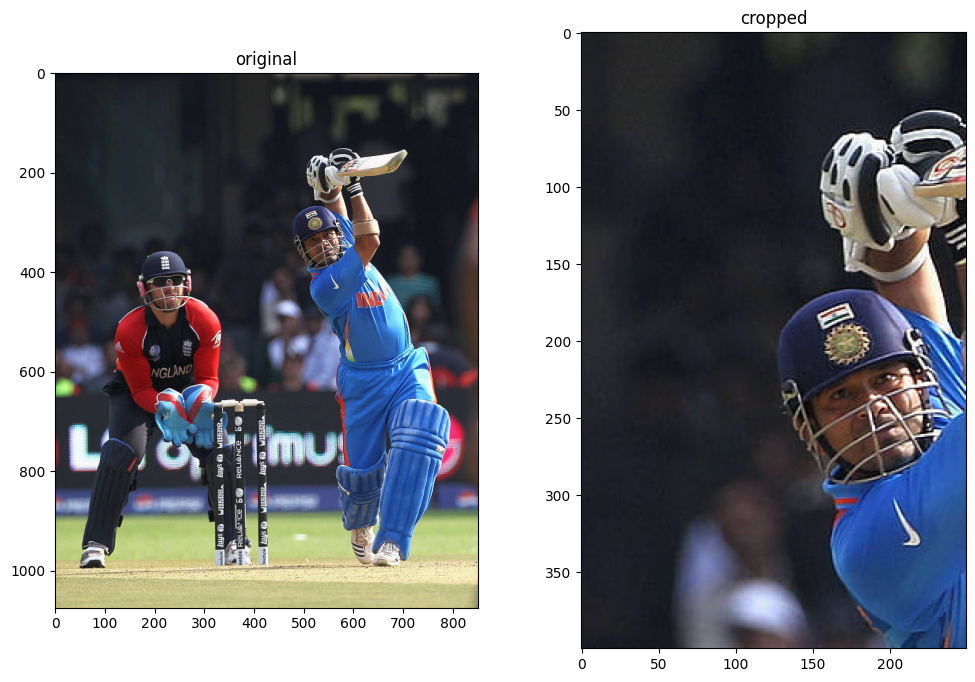

In [128]:
croppedImage = img_rgb[100:500, 350:600]
plt.figure(figsize = (12, 8))
plt.subplot(1,2,1)
plt.title('original')
plt.imshow(img_rgb)
plt.subplot(1,2,2)
plt.title('cropped')
plt.imshow(croppedImage)

#### using pillow

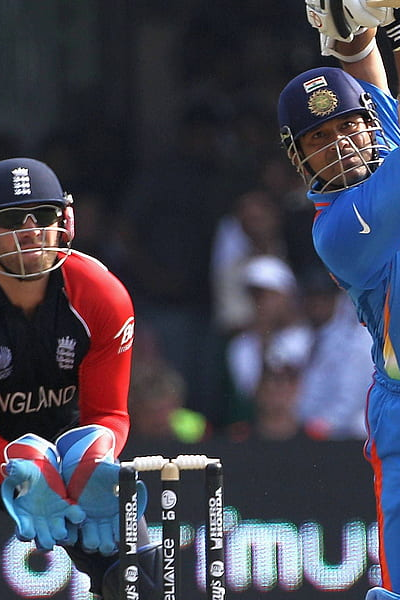

In [135]:
img_pil.crop((200, 200, 600, 800))

### image shearing

In [138]:
shear_x = .25
shear_y = .40
M = np.array([[1, shear_x, 0],
              [shear_y, 1, 0], 
              [0, 0, 1]])
M

array([[1.  , 0.25, 0.  ],
       [0.4 , 1.  , 0.  ],
       [0.  , 0.  , 1.  ]])

#### `cv2.warpPerspective(img, M, (width, height))`

In [142]:
img_shear = cv2.warpPerspective(img, M, (width, height))
cv2.imshow("tilted/shear image", img_shear)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
img_res = cv2.resize(img, (500, 600))
img_tra = cv2.warpAffine

## Affine Transformation

In [150]:
tx = 50 # translation -X
ty = 100 # translation -y
angle = 45 # rotation
scale = .8 # scaling factor
shear_x = .25 # tilt on x-axis
shear_y = .3 # tilt on y-axis

# define the affine transformation matrix

M = np.float32 ([[scale*np.cos(np.radians(angle)), shear_x, tx], 
                 [shear_y, scale*np.sin(np.radians(angle)), ty]])

In [152]:
M

array([[  0.56568545,   0.25      ,  50.        ],
       [  0.3       ,   0.56568545, 100.        ]], dtype=float32)

In [154]:
img_new = cv2.warpAffine(img, M, (width, height))

In [158]:
cv2.imshow('final image', img_new)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [161]:
tx = 50 # translation -X
ty = 100 # translation -y
angle = 90 # rotation
scale = .7 # scaling factor
shear_x = .25 # tilt on x-axis
shear_y = .3 # tilt on y-axis

# define the affine transformation matrix

M = np.float32 ([[scale*np.cos(np.radians(angle)), shear_x, tx], 
                 [shear_y, scale*np.sin(np.radians(angle)), ty]])
img_new = cv2.warpAffine(img, M, (width, height))
cv2.imshow('final image', img_new)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [165]:
a = np.array([[1, 2, 3],[4, 5, 6],[7, 8, 9]])
b = np.random.randint(0, 13, size = (3,3))

In [169]:
a@b

array([[ 18,  39,  21],
       [ 42,  99,  57],
       [ 66, 159,  93]])

In [171]:
np.dot(a,b)

array([[ 18,  39,  21],
       [ 42,  99,  57],
       [ 66, 159,  93]])

In [173]:
a.dot(b)

array([[ 18,  39,  21],
       [ 42,  99,  57],
       [ 66, 159,  93]])